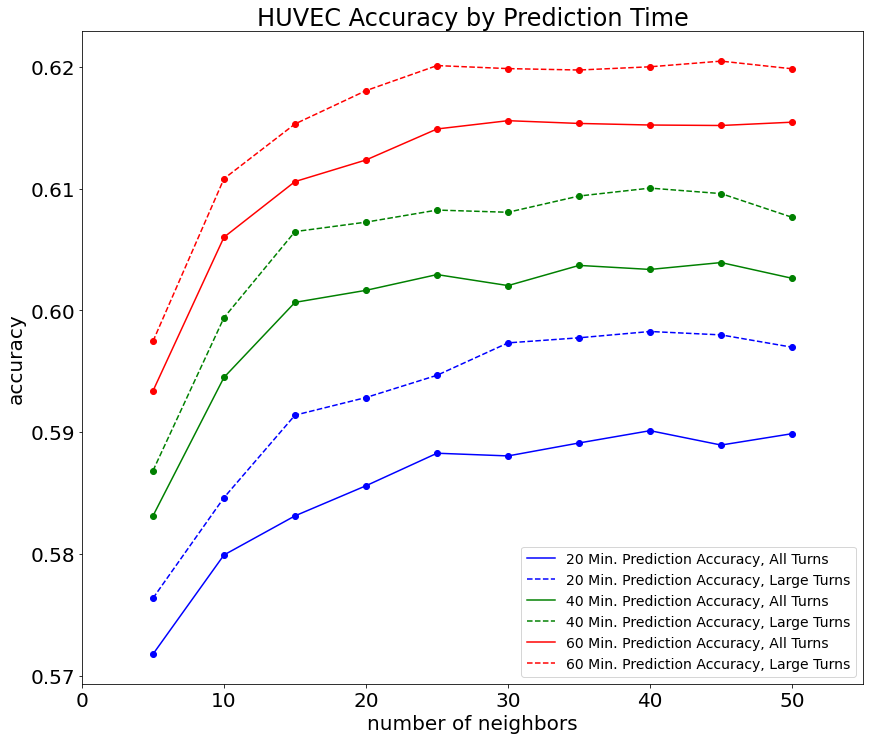

In [4]:
# This script demonstrates how to plot network accuracies for a single cell type. 
# The plot displays accuracy as a function of the number of nearest neighbors taken into account (5-50), 
#     as well as the prediction time interval (here, 20, 40, and 60 minute prediction intervals).
# The plots are then saved as .jpg and .pdf files. 
# A sample .csv containing accuracy data over a range of conditions is provided as 'huvec_bulk.csv'.

# Import useful libraries: 
import numpy
from numpy import genfromtxt
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# If you're plotting data for different cell types, it may be handy to organize the plotting parameters neatly. 
# Here, we only plot data for HUVECs. 
which_data = 'huvec_bulk'

if(which_data == 'huvec_bulk'):
    where_data = 'huvec_bulk.csv'
    title_name_1 = ' Min. Prediction ('
    title_name_2 = ' Step), HUVEC Accuracy'
    save_name = '_step_HUVEC_Bulk_Accuracy.jpg'
    ylim_min = 0.5
    ylim_max = 0.7
    minute_delay = 10  # Time between frames in timelapse movie
    
    
# Accuracy data is organized as: 
# First column: future predictin timesteps (in NN training run)
# Second column: number of nearest neighbors (in network structure)
# Third column: all accuracy values
# Fourth column: "large" turning angle accuracy values (20-160 degree restriction)
# Fifth column: unused 
X = genfromtxt(where_data, delimiter=',')

steps  = X[:,0]
nbrs = X[:,1]
acc = X[:,2]
large = X[:,3]

un_steps = numpy.unique(steps)

# Set up figure: 
figure(figsize=(14, 12))
plt.rcParams.update({'font.size': 20})

color_list = ['b', 'g', 'r', 'c', 'm', 'orange']

# For all unique prediction timestep values, generate a new plot in figure with consistent colors: 
for i in range(len(un_steps)):
    
    step_i = int(un_steps[i])
    idxs = numpy.where(steps == step_i)[0]
    
    nbrs_i = nbrs[idxs]
    acc_i = acc[idxs]
    large_i = large[idxs]
   
    min_string = str(step_i*minute_delay)
    label = min_string + ' Min. Prediction Accuracy, All Turns'
    label_large = min_string + ' Min. Prediction Accuracy, Large Turns'
    
    plt.plot(nbrs_i, acc_i, label=label, c=color_list[i])
    plt.scatter(nbrs_i, acc_i, c=color_list[i])

    plt.plot(nbrs_i, large_i, label=label_large, linestyle='dashed', c=color_list[i])
    plt.scatter(nbrs_i, large_i, c=color_list[i])


plt.legend(loc="lower right", prop={'size': 14})
    
title_str = 'HUVEC Accuracy by Prediction Time'

plt.title(title_str)
plt.xlabel('number of neighbors')
plt.ylabel('accuracy')

plt.xlim(0,55)
#plt.ylim(ylim_min, ylim_max)

# Save plots: 
save_str = './plots_may/' + 'HUVEC_Bulk_Prediction_Time_Sweep.jpg'
plt.savefig(save_str)
save_str_pdf = save_str[:-3] + 'pdf'
plt.savefig(save_str_pdf)

plt.show()